In [1]:
# Load all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Turning off the warning in the whole ML
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment=None

In [2]:
# Load the dataset
titanic_df = pd.read_csv('titanic_train.csv')

In [3]:
# Shape of the data
print('Number of rows = ',titanic_df.shape[0])
print('Number of columns = ',titanic_df.shape[1])

Number of rows =  891
Number of columns =  12


In [4]:
# Viewing the entire data
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Info of the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Describe of the data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Columns of the data
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis

In [8]:
sns.set_palette('RdBu_r')
sns.set_style('whitegrid')

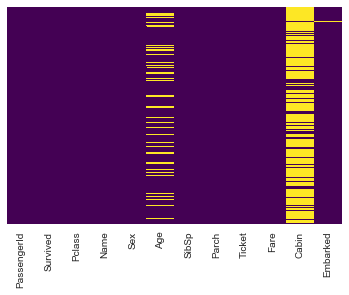

In [9]:
# Visualize the missing columns with heatmap
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
# Replacing the missing age values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
# Applying the replacing function
titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(impute_age, axis=1)

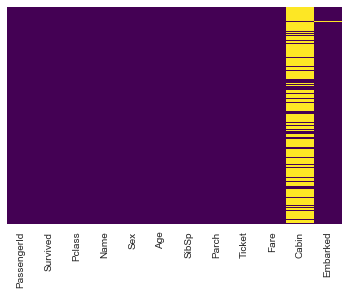

In [12]:
# Visualizing for the missing columns with heatmap the second time
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
# Drop the column ('Cabin') with so much missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

In [14]:
# Finally remove the remaining missing value in the columns of the entire data
titanic_df.dropna(inplace=True)

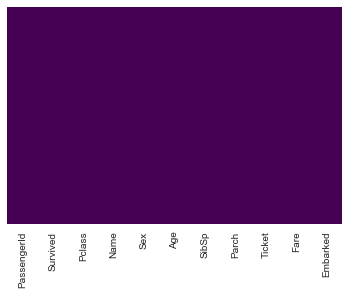

In [15]:
# Visualizing for the missing columns with heatmap the third time
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
# Applying get_dummies on categorical columns ('Sex', 'Embarked')
sex = pd.get_dummies(titanic_df['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_df['Embarked'], drop_first=True)

In [17]:
# Concatinating the new columns with the original data
titanic_df = pd.concat([titanic_df, sex, embark], axis=1)

In [18]:
# Dropping the original unwanted columns like the categorical columns and columns that had just been transformed to numerical columns
titanic_df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [19]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [20]:
sns.set_palette('RdBu_r')
sns.set_style('whitegrid')

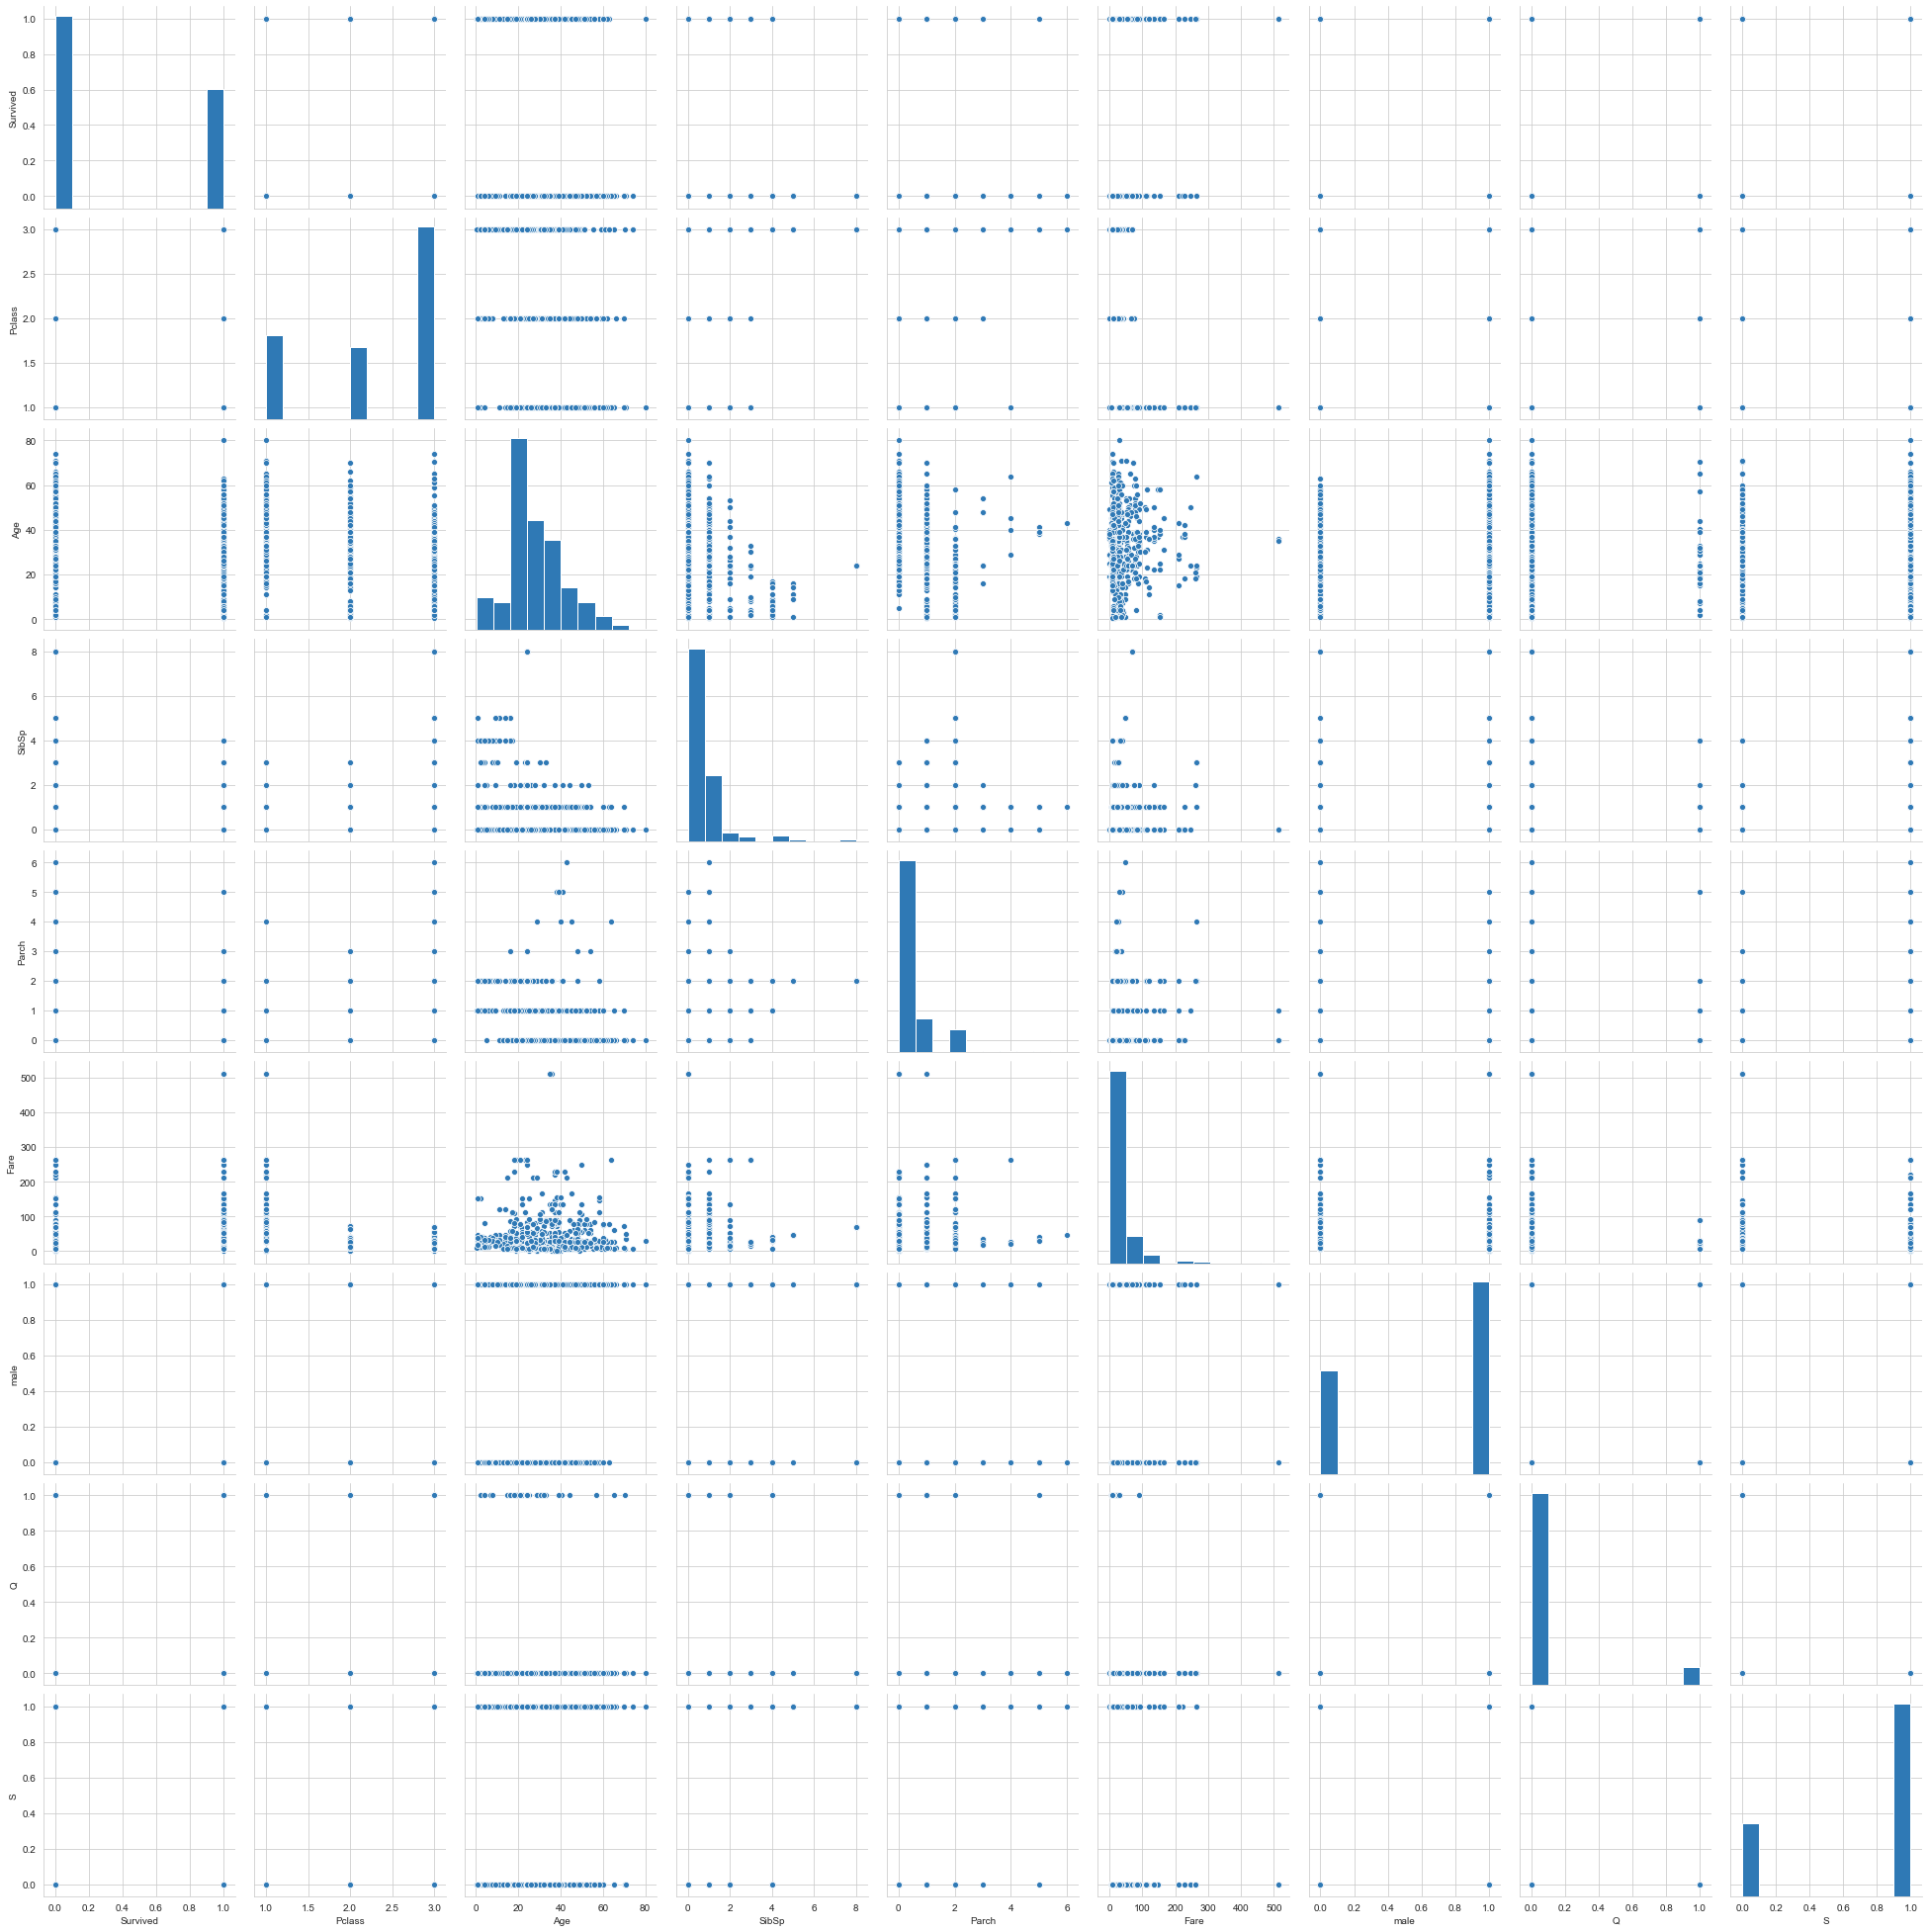

In [21]:
# Pairplot
sns.pairplot(titanic_df, height=3)

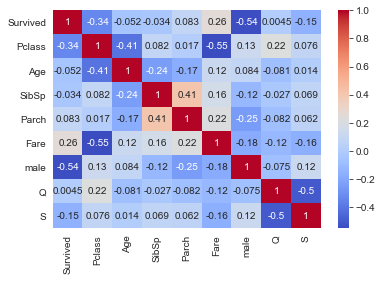

In [22]:
# Heatmap
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')

In [23]:
# Split columns into X and y
X = titanic_df.drop('Survived',axis=1)
y = titanic_df['Survived']

In [24]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
# Create and train model(X_train, y_train)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Prediction
predictions = model.predict(X_test)

In [28]:
# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)

In [29]:
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

